# UDACITY DATA ANALYSIS NANODEGREES


## Project III - Visualizing FordGoBike Data 
      By Johnson Joseph  

 ## Investigation Overview

- Here we want to look at how that age category 26 - 35 take more trips 
- The duration of most ike trips is between 5 - 10 minutes 
- Also see how that most bike trips are taken in the morning or the afternoon in the top stations
 

## Dataset Overview

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.[5] The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

The data consists of information regarding over 3 million bike rides from January 2018 to July 2019. Including start details, end details and anonymised user details.

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [29]:
# import the new data into a dataframe
data = pd.read_csv('fordgo_master_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Bike Trips, by Age Category

This confirms that  age between 26 and 35 take more trips


In [30]:
# create a group category of age 

data['age_group'] = data['member_age'].apply(lambda x: '0 - 18' if 0<x<=18
                                                  else '19 - 25' if 18<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=65
                                                       else x)

In [31]:
# create age order 
group_means = data.groupby(['age_group']).count()
age_order = group_means.sort_values(['age_group'], ascending = True).index

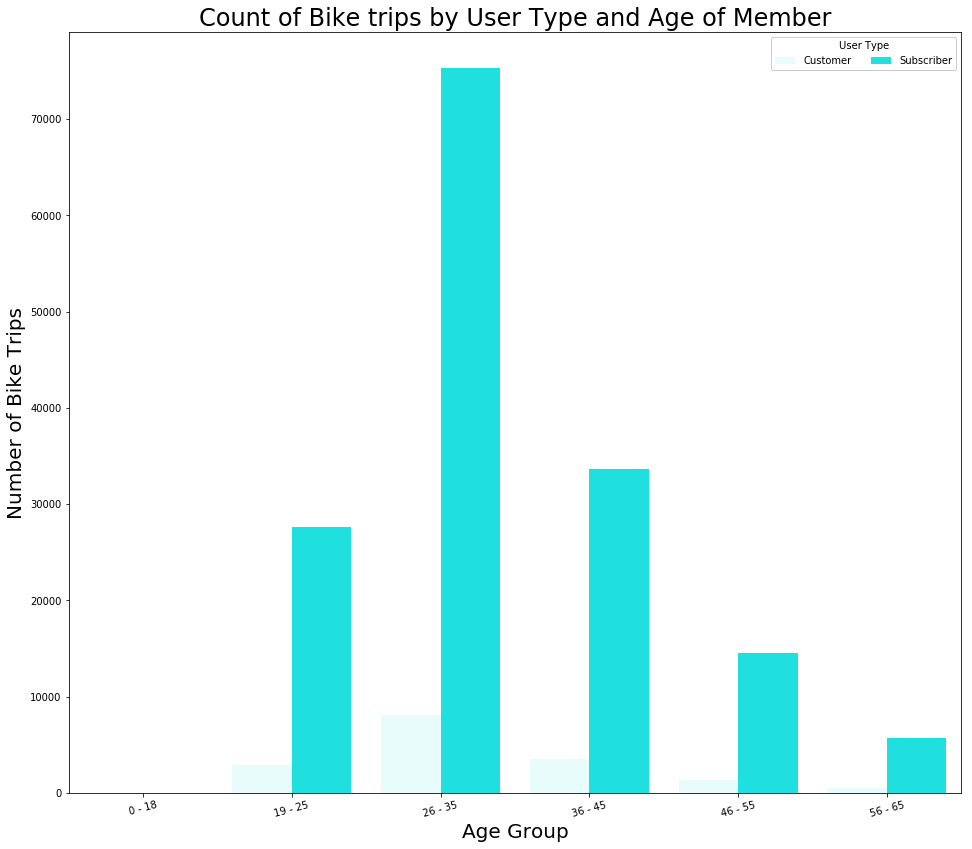

In [32]:
fig, ax = plt.subplots( figsize = [16,14])

ax = sb.countplot(data = data, x = 'age_group', hue = 'user_type', color= '#00FFFF', order=age_order);

ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type')
plt.xticks(rotation = 15)
plt.xlabel('Age Group',fontsize= 20)
plt.ylabel('Number of Bike Trips',fontsize= 20);
plt.title('Count of Bike trips by User Type and Age of Member', fontsize=24);


##  Hourly Bike Usage

By analysing the hourly usag data, the distribution is bimodal in nature. Furthermore, this distribution looks to confirm the earlier supposition that the weekday usage is primarily driven by commuters. This is driven by the peak times of 8-9am, and 5-6pm where the majority of the workforce tend to make their daily commute.

Text(0.5,1.05,'Hourly Bike usage')

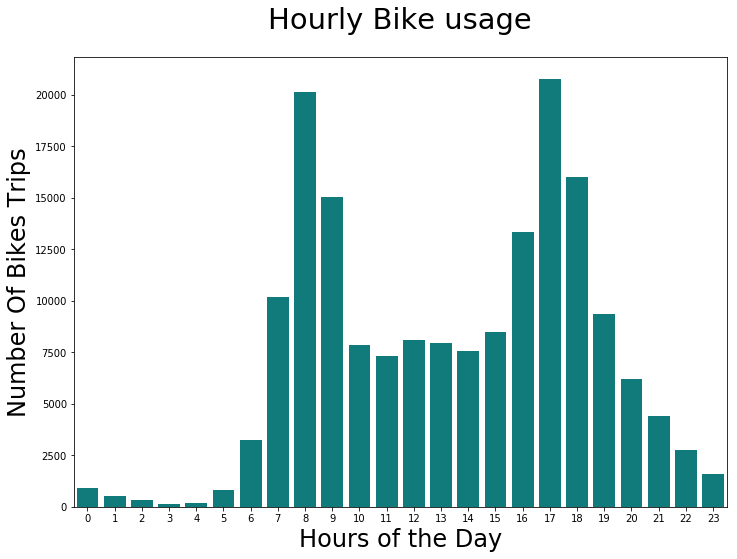

In [33]:
fig, ax = plt.subplots()
ax = sb.countplot(data = data, x ='start_hour', color = 'darkcyan')
ax.set_xlabel("Hours of the Day", fontsize=24) 
ax.set_ylabel("Number Of Bikes Trips", fontsize=24)
fig.set_size_inches(11.7, 8.27)
ax.set_title('Hourly Bike usage', y=1.05, fontsize=29)

##  Distribution of Trips taken at Top stations

Here this shows that Afternoon and Morning periods have the highest for number of trips for all top start stations.


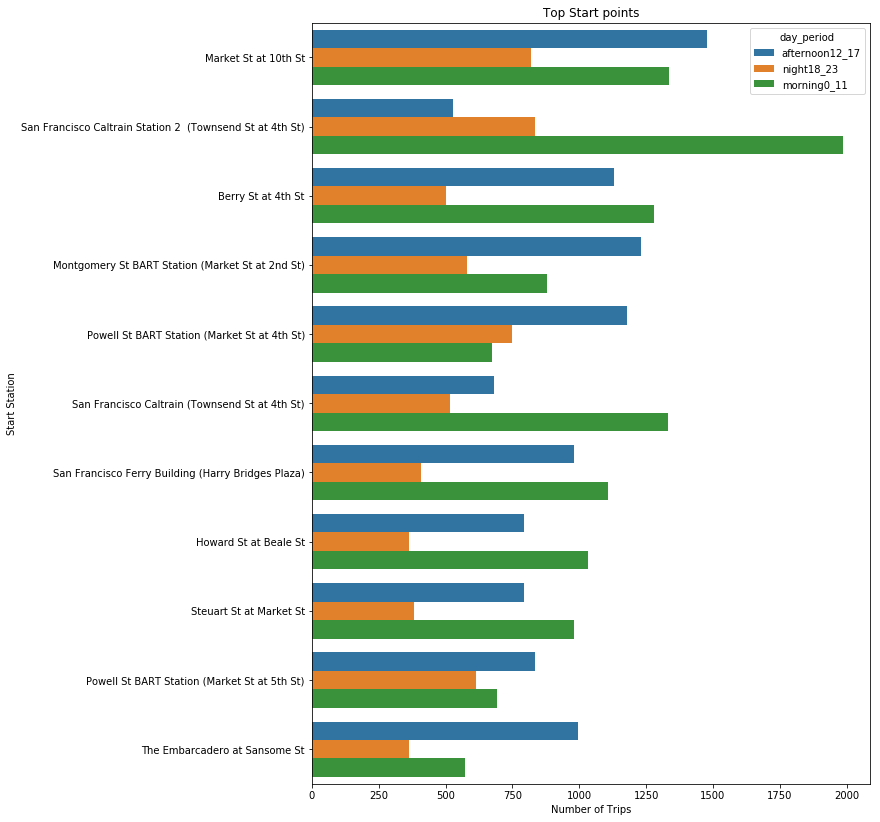

In [34]:
# Boxplot between start_station_name and day_period to visualize their effect on Bike trips..
fig, ax = plt.subplots()
ax= sb.countplot(y='start_station_name',data= data,hue='day_period', order=data.start_station_name.value_counts().index[:11])
ax.set(xlabel='Number of Trips', ylabel='Start Station', title= 'Top Start points');
fig.set_size_inches(10, 14)
plt.show();

### Generate Slideshow
  

In [35]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 395279 bytes to Part_II_slide_deck_template.slides.html


In [36]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file
